## **Model Training For Gemstone Dataset**

### **Import Required Libraries**

In [18]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Hyperparameters
from sklearn.model_selection import RandomizedSearchCV

### **Read Gemstone Dataset**

In [19]:
df= pd.read_csv('data/gemstone.csv')
print(df.shape)
df.head()

(193573, 11)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### **Droping the id Column**

In [20]:
df= df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### **Getting X and y Variables**

In [21]:
X= df.drop(labels=['price'],axis=1)
print(X.shape)
X.head()

(193573, 9)


,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [22]:
y = df[['price']]
print(y.shape)
y.head()

(193573, 1)


,price
0,13619
1,13387
2,2772
3,666
4,14453


### **Create Data Transformation Pipeline**

In [49]:
# Define Which Columns Should be Ordinal-Encoded
categorical_variables= X.select_dtypes(include='object').columns
numerical_variables= X.select_dtypes(exclude='object').columns

# Define the Custom Ranking For Each Ordinal Variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [50]:
# Model Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [51]:
# Numerical Pipeline
numerical_pipeline= Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [52]:
# Categorical Pipeline
categorical_pipeline= Pipeline(
        steps= [
                ('inputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
                ('scaler', StandardScaler())
        ]
)

In [53]:
# Preprocessor
preprocessor = ColumnTransformer(
    [
        ('numerical_pipeline', numerical_pipeline, numerical_variables),
        ('categorical_pipeline', categorical_pipeline, categorical_variables)
    ]
)

### **Train Test Split**

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
X_train

(154858, 9)


,carat,cut,color,clarity,depth,table,x,y,z
83475,0.32,Premium,E,SI1,61.6,58.0,4.38,4.41,2.71
160324,1.20,Premium,F,VS2,62.6,57.0,6.81,6.76,4.25
101740,1.50,Ideal,I,VS2,62.2,55.0,7.30,7.26,4.53
180341,1.67,Premium,I,SI2,61.9,59.0,7.65,7.61,4.71
48480,1.00,Good,H,VS2,63.7,60.0,6.34,6.30,4.02
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [56]:
print(X_test.shape)
X_test

(38715, 9)


,carat,cut,color,clarity,depth,table,x,y,z
14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14
165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89
96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52
145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71
118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
168548,1.01,Good,I,SI1,63.5,59.0,6.39,6.32,4.04
167333,0.31,Ideal,D,VS2,61.3,55.0,4.43,4.46,2.72
113317,0.90,Very Good,F,SI1,62.4,63.0,6.09,6.13,3.81
25575,0.50,Very Good,F,SI1,62.0,60.0,5.12,5.08,3.16


### **Transforming The Data With the Pipeline Created**

In [57]:
X_train= pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

X_test= pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [61]:
print(X_train.shape)
X_train.head()

(154858, 9)


,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,-0.132842,-0.936018,-0.648950
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,-0.132842,-0.320002,0.017052
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,0.872563,1.528047,0.017052
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,-0.132842,1.528047,-1.314953
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,-2.143651,0.912031,0.017052


In [62]:
print(X_test.shape)
X_test.head()

(38715, 9)


,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,0.872563,-1.552034,-0.648950
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,-1.138246,0.296015,-1.314953
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,-0.132842,-0.936018,2.015061
3,-1.016395,-0.574346,0.923751,-1.157458,-1.160213,-1.194148,-0.132842,1.528047,2.015061
4,0.860819,0.628251,-0.639679,0.949167,0.987125,1.007145,0.872563,0.912031,-0.648950


In [63]:
preprocessor.get_feature_names_out()

array(['numerical_pipeline__carat', 'numerical_pipeline__depth',
       'numerical_pipeline__table', 'numerical_pipeline__x',
       'numerical_pipeline__y', 'numerical_pipeline__z',
       'categorical_pipeline__cut', 'categorical_pipeline__color',
       'categorical_pipeline__clarity'], dtype=object)

### **Model Training Baseline Models**

### Create an Evaluate Function to Give all Metrics After Model Training

In [64]:
def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square= r2_score(true, predicted)
    return mae, rmse,r2_square

### **Training Various Models**

In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [66]:
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train.values.flatten()) # Train Model

    # Make Predictions
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')

    print('Model Performance For Test Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 1016.9490
- Mean Absolute Error: 677.1656
- R2 Score: 0.9366
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 1006.6010
- Mean Absolute Error: 671.5856
- R2 Score: 0.9373


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 1017.0718
- Mean Absolute Error: 678.3145
- R2 Score: 0.9366
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 1006.8716
- Mean Absolute Error: 672.8635
- R2 Score: 0.9373


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 1016.9491
- Mean Absolute Error: 677.1925
- R2 Score: 0.9366
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 1006.6062
- Mean Absolute Error: 671.6137
- R2 Score: 0.9373


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 545.6563
- Mean Absolute Error: 285.8181
- R2 Sco

### **Results**

In [69]:
df_results= pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

In [70]:
df_results

,Model Name,R2_Score
7,CatBoosting Regressor,0.979186
6,XGBRegressor,0.978790
5,Random Forest Regressor,0.977245
3,K-Neighbors Regressor,0.972114
4,Decision Tree,0.957262
0,Linear Regression,0.937298
2,Ridge,0.937297
1,Lasso,0.937264
8,AdaBoost Regressor,0.872612


### **Hyperparameter Tuning**

In [72]:
# Initializing Catboost
cbr= CatBoostRegressor(verbose=False)

# Creating the Hyperparameter Grid
param_dist= {
    'depth': [4,5,6,7,8,9,10],
    'learning_rate': [0.01,0.02,0.03,0.04,0.05],
    'iterations': [300,400,500,600]
}

# Instantiate the RandomSearchCV Object
rscv= RandomizedSearchCV(cbr, param_dist, scoring='r2', cv=5, n_jobs=-1)

# Fit the Model
rscv.fit(X_train, y_train)

# Print The Tuned Parameters and Score
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.03, 'iterations': 600, 'depth': 10}
0.9797894093843876


### **Definition to Print Evaluated Model Results**

In [77]:
def print_evaluated_results(model,X_train,y_train,X_test,y_test):
    ytrain_pred = model.predict(X_train)
    ytest_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, ytest_pred)

    # Printing results
    print('Model performance for Training Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [78]:
# Selecting the Best Model
best_cbr= rscv.best_estimator_

# Evaluate Train and Test Dataset
print_evaluated_results(best_cbr, X_train, y_train, X_test, y_test)

Model performance for Training Set
- Root Mean Squared Error: 543.2550
- Mean Absolute Error: 287.8718
- R2 Score: 0.9819
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 575.2454
- Mean Absolute Error: 294.9648
- R2 Score: 0.9795


### **Tuning KNN**

In [79]:
from sklearn.model_selection import GridSearchCV

# Initialize KNN
knn= KNeighborsRegressor()

# Parameters
k_range= list(range(2,31))
param_grid= dict(n_neighbors=k_range)

# Fitting the cvmodel
grid= GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 16}
0.9736029547852756


In [80]:
# Selecting the Best Model
best_knn= grid.best_estimator_


# Evaluate Train and Test Dataset
print_evaluated_results(best_knn, X_train, y_train, X_test, y_test)

Model performance for Training Set
- Root Mean Squared Error: 610.3458
- Mean Absolute Error: 319.3932
- R2 Score: 0.9772
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 643.8459
- Mean Absolute Error: 336.3468
- R2 Score: 0.9743


### **Tuning XGBoost**

In [81]:
# Initializing XGBoost
xgb= XGBRegressor()

# Parameters
params= {
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,7,8,9,10,11,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'n_estimators': [300,400,500,600]

}

rs_xgb= RandomizedSearchCV(xgb, param_distributions=params, scoring='r2',cv=5, n_jobs=-1)
rs_xgb.fit(X_train, y_train)

# Print The Tuned Parameters and Score
print(rs_xgb.best_params_)
print(rs_xgb.best_score_)

{'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.9790161516662254


In [82]:
# Selecting The Best xgb Model
best_xgb = rs_xgb.best_estimator_

# Evaluate Train and Test Dataset
print_evaluated_results(best_xgb,X_train,y_train,X_test,y_test)

Model performance for Training Set
- Root Mean Squared Error: 532.1846
- Mean Absolute Error: 282.2662
- R2 Score: 0.9826
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 585.9136
- Mean Absolute Error: 297.1400
- R2 Score: 0.9788


### **Voting Regressor**

In [85]:
from sklearn.ensemble import VotingRegressor

er= VotingRegressor([('cbr', best_cbr), ('knn', best_knn), ('xgb', XGBRegressor())], weights=[3,1,2])
er.fit(X_train, y_train)

print_evaluated_results(er, X_train, y_train, X_test, y_test)

c:\gitrepos\gemstone_price_prediction\gem_env\lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model performance for Training Set
- Root Mean Squared Error: 529.6230
- Mean Absolute Error: 280.4085
- R2 Score: 0.9828
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 574.8864
- Mean Absolute Error: 293.2567
- R2 Score: 0.9795


#### Insight
- Model Improved With Ensemble Technique!!!

### **CatBoost Model Feature Importance**

numerical_pipeline__carat        22.353296
categorical_pipeline__clarity    18.964447
numerical_pipeline__x            15.967791
numerical_pipeline__y            15.635191
categorical_pipeline__color      13.456382
numerical_pipeline__z            12.484313
categorical_pipeline__cut         0.528013
numerical_pipeline__table         0.324185
numerical_pipeline__depth         0.286381
dtype: float64




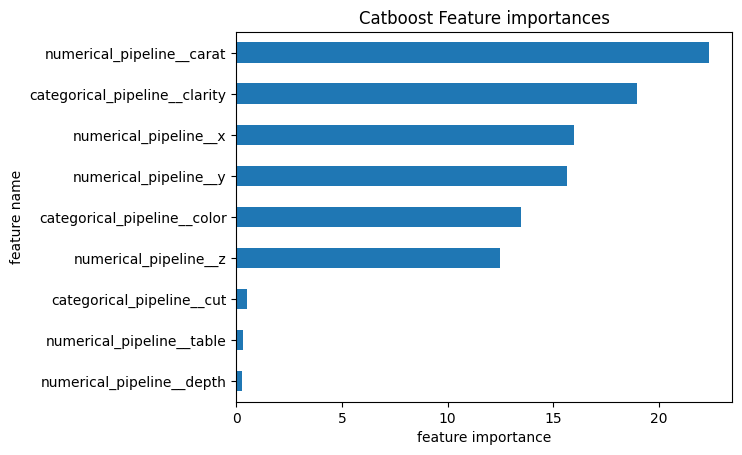

In [87]:
feature_imp = best_cbr.feature_importances_
feature_nm = best_cbr.feature_names_
imp_series = pd.Series(feature_imp)
imp_series.index = feature_nm
print(imp_series.sort_values(ascending=False))
print('\n')
imp_series.sort_values().plot(kind='barh',
                              xlabel='feature importance',
                              ylabel='feature name',
                              title='Catboost Feature importances')
plt.show()